## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [148]:
import zipfile
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Specify the path to your SQLite database file
db_file_path = 'data/im.db'

# Create a connection to the database
conn = sqlite3.connect(db_file_path)

# Define your SQL query to retrieve specific columns, including one "movie_id" column
query = '''
    SELECT basics.movie_id AS merged_movie_id, basics.primary_title, basics.original_title,
           basics.start_year, basics.runtime_minutes, basics.genres,
           ratings.averagerating, ratings.numvotes
    FROM movie_basics AS basics
    INNER JOIN movie_ratings AS ratings ON basics.movie_id = ratings.movie_id
'''

# Use pandas to read the query result into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


# EDA & DATA CLEANING

In [108]:
df.head()

,merged_movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [109]:
df.tail()

,merged_movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


In [110]:
df.columns

Index(['merged_movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [111]:
df.info()#getting the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   merged_movie_id  73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [112]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [130]:
df.shape

(73856, 9)

In [131]:
df.count()

merged_movie_id    73856
primary_title      73856
original_title     73856
start_year         73856
runtime_minutes    73856
genres             73856
averagerating      73856
numvotes           73856
split_genres       73856
dtype: int64

In [132]:
df.duplicated().sum()

TypeError: unhashable type: 'list'

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Round the percentage to two decimal places
missing_percentage = missing_percentage.round(2)

# Create a new DataFrame to display the missing percentage
missing_info = pd.DataFrame({'Column Name': df.columns, 'Missing Percentage': missing_percentage})

# Print the missing information DataFrame
print(missing_info)


                     Column Name  Missing Percentage
merged_movie_id  merged_movie_id                0.00
primary_title      primary_title                0.00
original_title    original_title                0.00
start_year            start_year                0.00
runtime_minutes  runtime_minutes               10.32
genres                    genres                1.09
averagerating      averagerating                0.00
numvotes                numvotes                0.00


In [133]:
# Impute missing values with the mean
df['runtime_minutes'].fillna(df['runtime_minutes'].mean(), inplace=True)
# Impute missing values with the mean
df['genres'].fillna(df['genres'].mode()[0], inplace=True)

In [134]:
# Convert the "start_year" column to datetime format
df['start_year'] = pd.to_datetime(df['start_year'], format='%Y')


In [135]:
df['genres']

0          Action,Crime,Drama
1             Biography,Drama
2                       Drama
3                Comedy,Drama
4        Comedy,Drama,Fantasy
                 ...         
73851             Documentary
73852            Drama,Family
73853             Documentary
73854                   Drama
73855             Documentary
Name: genres, Length: 73856, dtype: object

In [136]:
df['genres'][0].split(',')

['Action', 'Crime', 'Drama']

In [137]:
# Split the strings in the 'genres' column into lists
df['split_genres'] = df['genres'].str.split(',')

In [138]:
df

,merged_movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,split_genres
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,175.00000,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019-01-01,114.00000,"Biography,Drama",7.2,43,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018-01-01,122.00000,Drama,6.9,4517,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018-01-01,94.65404,"Comedy,Drama",6.1,13,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017-01-01,80.00000,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019-01-01,75.00000,Documentary,6.2,6,[Documentary]
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019-01-01,98.00000,"Drama,Family",8.7,136,"[Drama, Family]"
73853,tt9914642,Albatross,Albatross,2017-01-01,94.65404,Documentary,8.5,8,[Documentary]
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019-01-01,94.65404,Drama,6.6,5,[Drama]


In [139]:
df['split_genres'].explode().unique()

array(['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy',
       'Horror', 'Thriller', 'Adventure', 'Animation', 'History',
       'Documentary', 'Mystery', 'Sci-Fi', 'Family', 'Romance', 'War',
       'Music', 'Sport', 'Western', 'Musical', 'News', 'Reality-TV',
       'Game-Show', 'Adult', 'Short'], dtype=object)

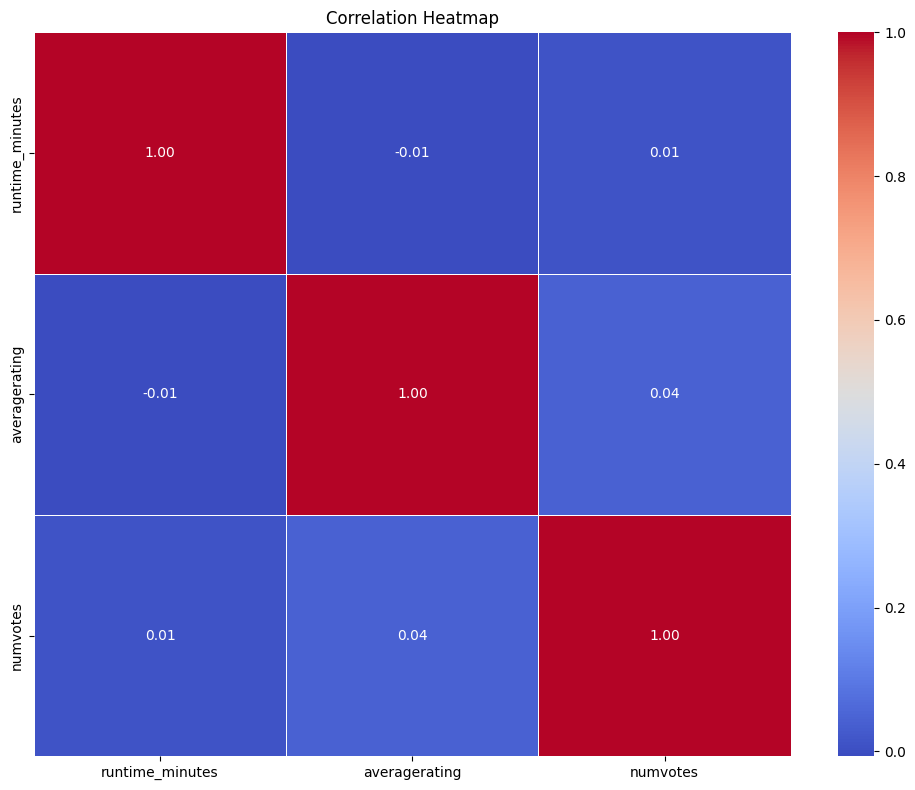

<Figure size 640x480 with 0 Axes>

In [169]:
# Calculate the correlation matrix for selected columns
corr_matrix = df[['runtime_minutes', 'averagerating', 'numvotes']].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.savefig('images/correlation_heatmap.jpeg')


In [140]:
#Count the occurrences of each genre
genre_counts = df['split_genres'].explode().value_counts()
print(genre_counts)

split_genres
Drama          31592
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: count, dtype: int64


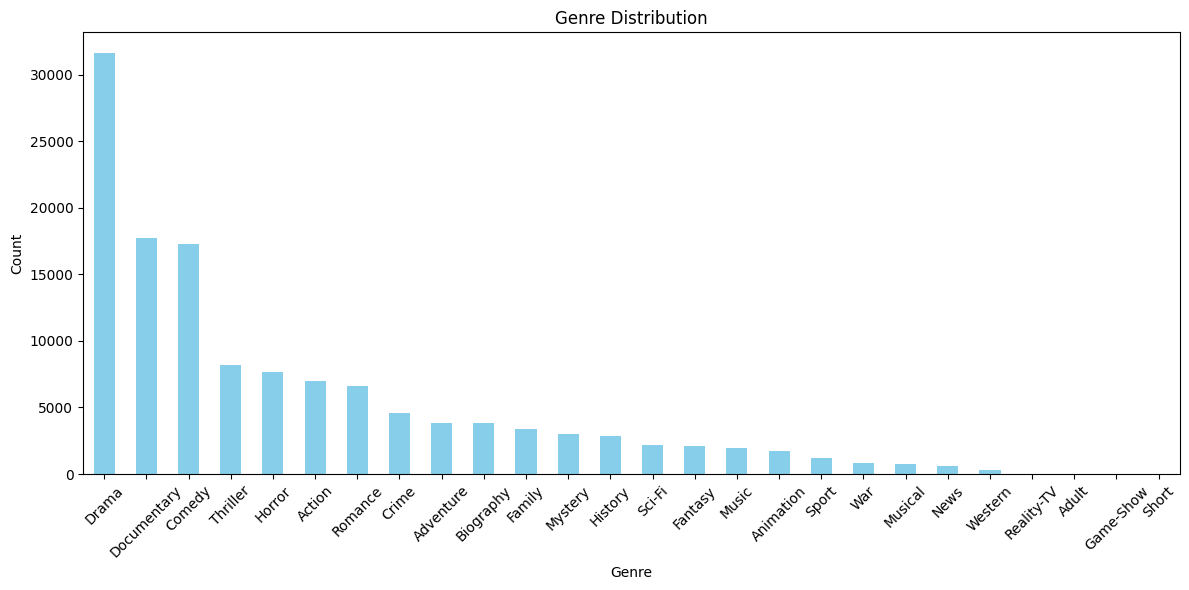

In [141]:
# Count the occurrences of each genre
genre_counts = df['split_genres'].explode().value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [142]:
#Find the most common genres:
most_common_genres = genre_counts.head(5)  # Change '5' to the number of top genres you want to see
print(most_common_genres)


split_genres
Drama          31592
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Name: count, dtype: int64


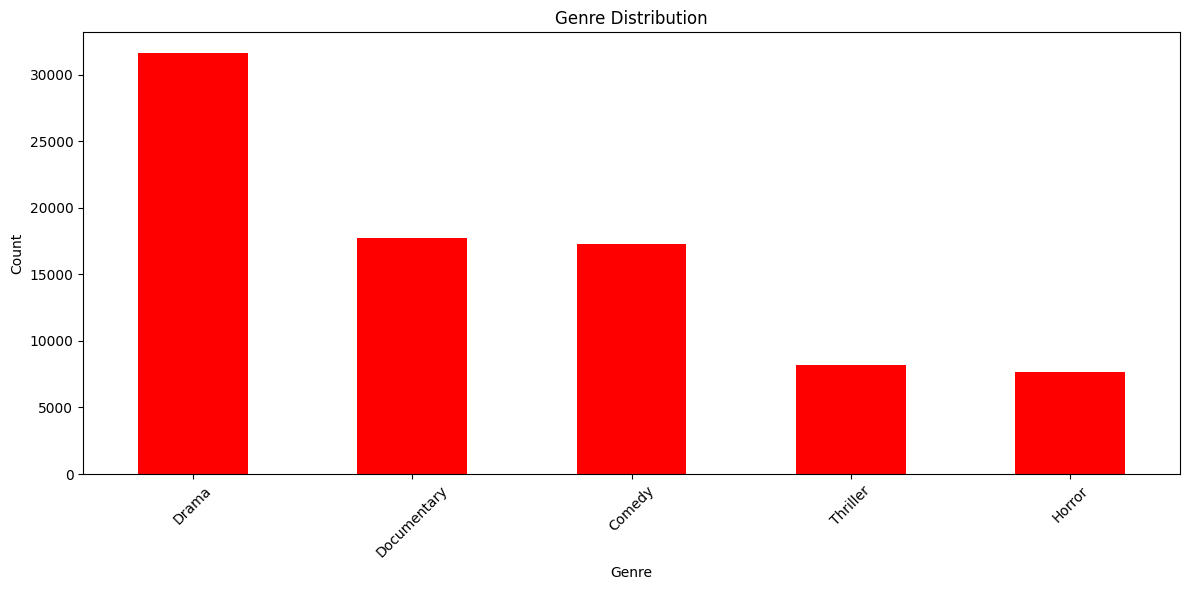

In [143]:
# Create a bar plot
plt.figure(figsize=(12, 6))
most_common_genres.plot(kind='bar', color='red')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [144]:
drama_movies = df[df['split_genres'].apply(lambda x: 'Documentary' in x)]
drama_movies[['primary_title', 'split_genres']]

,primary_title,split_genres
9,Cooper and Hemingway: The True Gen,[Documentary]
11,T.G.M. - osvoboditel,[Documentary]
20,Akakis mogzauroba,[Documentary]
23,Prague: The Restless Heart of Europe,"[Documentary, History]"
26,Abolição,[Documentary]
...,...,...
73848,Jeg ser deg,"[Crime, Documentary]"
73850,Swarm Season,[Documentary]
73851,Diabolik sono io,[Documentary]
73853,Albatross,[Documentary]


In [145]:
# Descriptive statistics for the 'averagerating' column
rating_stats = df['averagerating'].describe()
print(rating_stats)


count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


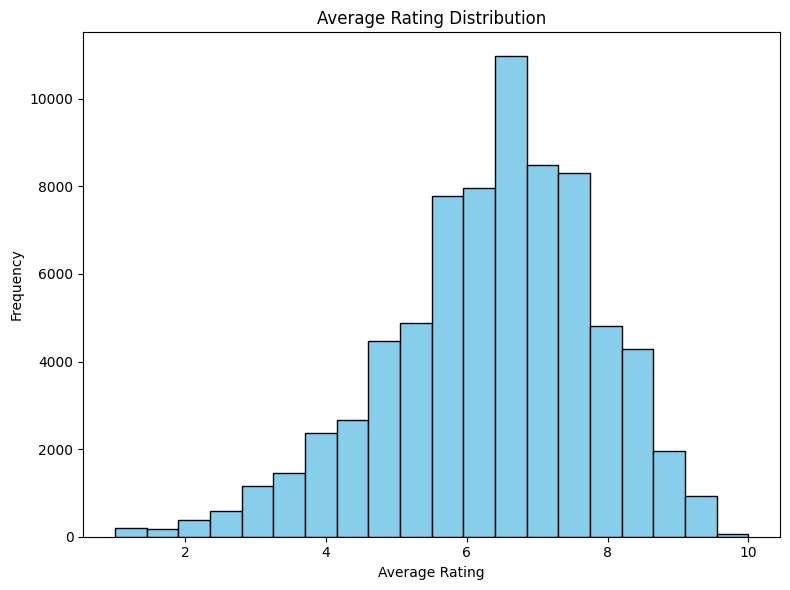

In [146]:
# Create a histogram of average ratings
plt.figure(figsize=(8, 6))
plt.hist(df['averagerating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


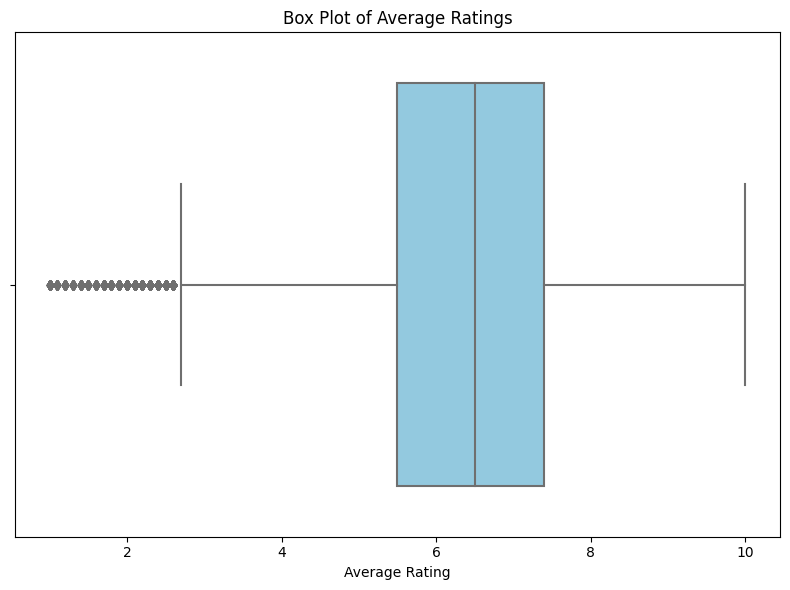

In [149]:

# Create a box plot for average ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='averagerating', data=df, color='skyblue')
plt.title('Box Plot of Average Ratings')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()


In [165]:
# Descriptive statistics for the 'numvotes' column
numvotes_stats = df['numvotes'].describe()
print(numvotes_stats)


count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64


In [150]:
# Calculate the correlation between average rating and numvotes
correlation = df['averagerating'].corr(df['numvotes'])
print(f'Correlation between Average Rating and Numvotes: {correlation}')


Correlation between Average Rating and Numvotes: 0.04447809440198394


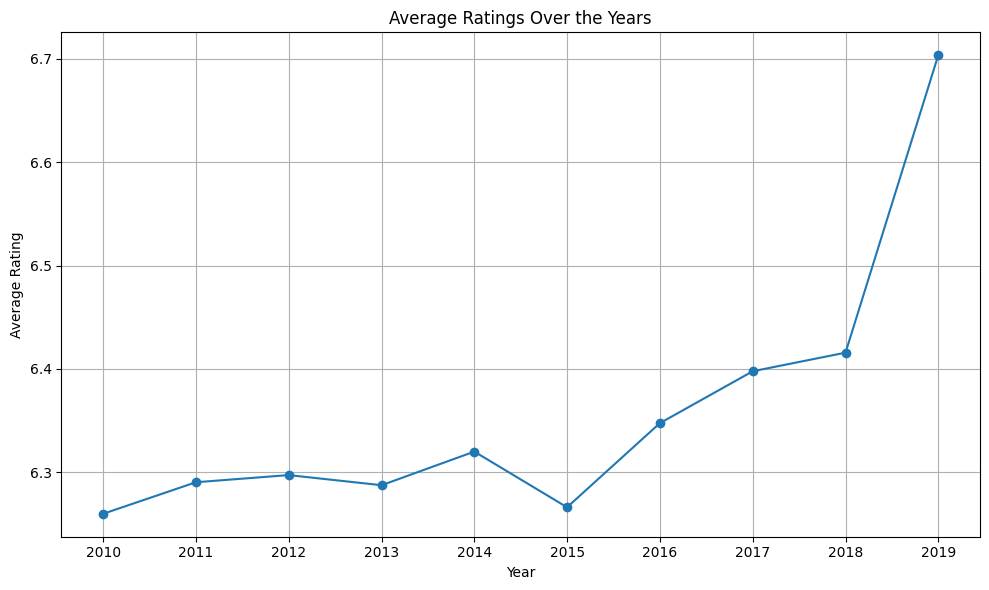

In [154]:
# Group data by year and calculate the mean rating for each year
average_ratings_by_year = df.groupby('start_year')['averagerating'].mean().reset_index()

# Create a line plot to visualize average ratings over the years
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_year['start_year'], average_ratings_by_year['averagerating'], marker='o', linestyle='-')
plt.title('Average Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


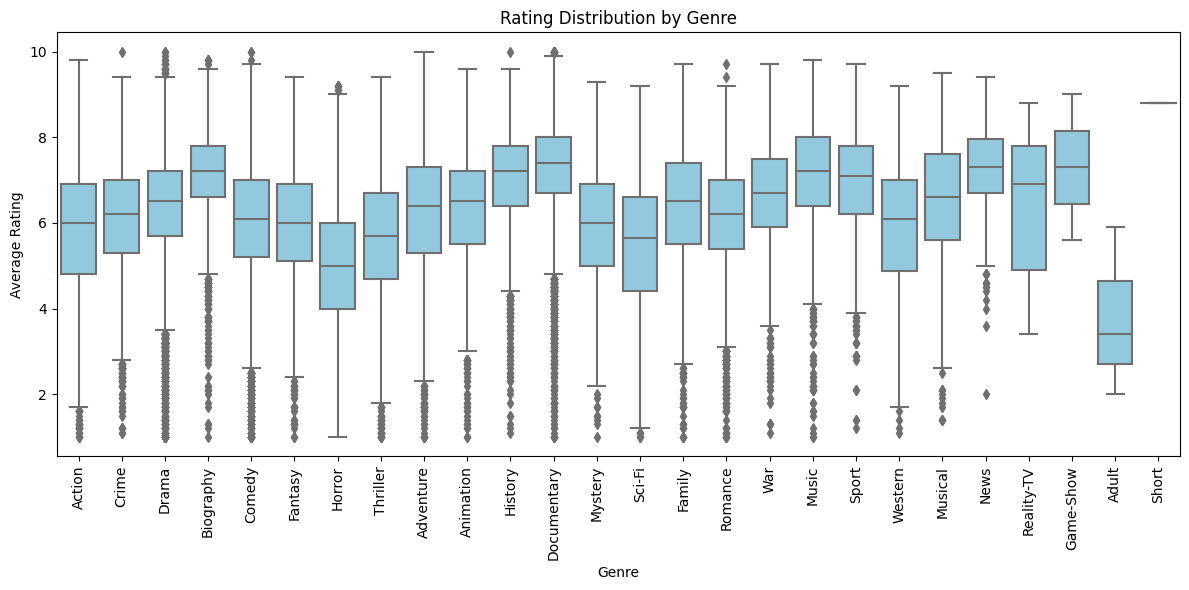

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explode the 'split_genres' column to create separate rows for each genre
exploded_df = df.explode('split_genres')

# Create a box plot to visualize rating distribution by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='split_genres', y='averagerating', data=exploded_df, color='skyblue')
plt.title('Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [156]:
# Display the top-rated movies
top_rated_movies = df.sort_values(by='averagerating', ascending=False).head(10)
print(top_rated_movies[['primary_title', 'averagerating']])


                                           primary_title  averagerating
51109                    Fly High: Story of the Disc Dog           10.0
65944                                     Calamity Kevin           10.0
71577                      Pick It Up! - Ska in the '90s           10.0
73616                                           Renegade           10.0
65755  Ellis Island: The Making of a Master Race in A...           10.0
878            The Dark Knight: The Ballad of the N Word           10.0
64646    A Dedicated Life: Phoebe Brand Beyond the Group           10.0
9745                                Freeing Bernie Baran           10.0
702       Exteriores: Mulheres Brasileiras na Diplomacia           10.0
49925                          Dog Days in the Heartland           10.0


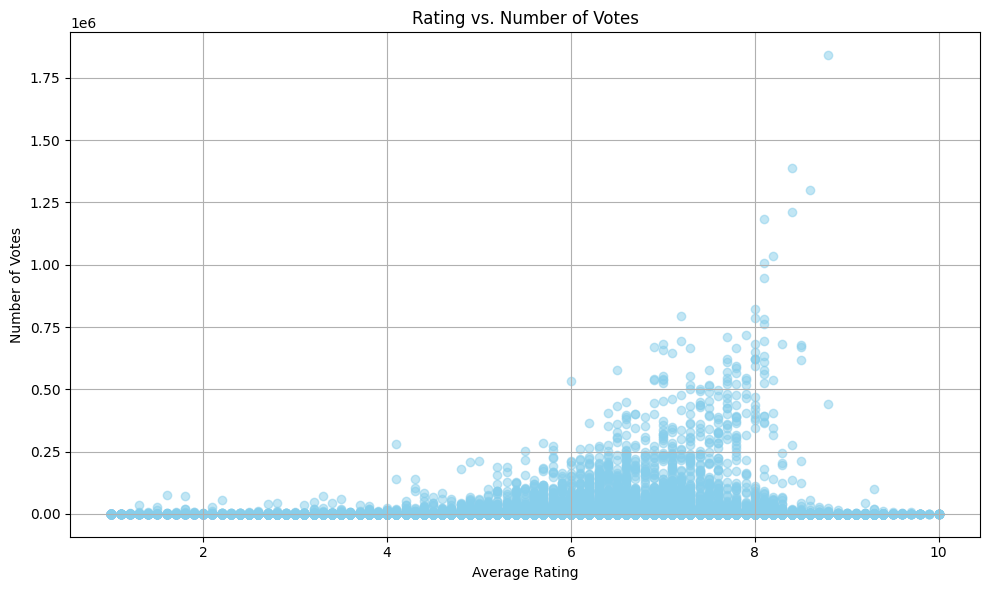

In [157]:
# Create a scatter plot to visualize the relationship between rating and number of votes
plt.figure(figsize=(10, 6))
plt.scatter(df['averagerating'], df['numvotes'], alpha=0.5, color='skyblue')
plt.title('Rating vs. Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.tight_layout()
plt.show()
